# TO - DO - Task

#Task 1. Classify Study Time:

In [1]:
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

In [2]:
low_study = []
moderate_study = []
high_study = []

for study, _, _ in time_data:
    if study < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)

print("Low:", low_study)
print("Moderate:", moderate_study)
print("High:", high_study)

Low: [2.5, 1.5, 2.0, 2.5]
Moderate: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High: [5.5, 6.0]


#Task 2. Based on Data

In [3]:
print(len(low_study), len(moderate_study), len(high_study))

4 9 2


#Task 3. Convert Study Hours to Minutes:

In [4]:
study_minutes = [s * 60 for s,_,_ in time_data]
print(study_minutes)

[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


#Task 4. Analyze Average Time Use:

In [5]:
study_hours=[s for s,_,_ in time_data]
ent_hours=[e for _,e,_ in time_data]
sleep_hours=[sl for *_,sl in time_data]

print(sum(study_hours)/len(study_hours))
print(sum(ent_hours)/len(ent_hours))
print(sum(sleep_hours)/len(sleep_hours))

3.7
2.5
7.166666666666667


#Task 5. Visualization - Study vs Sleep Pattern:

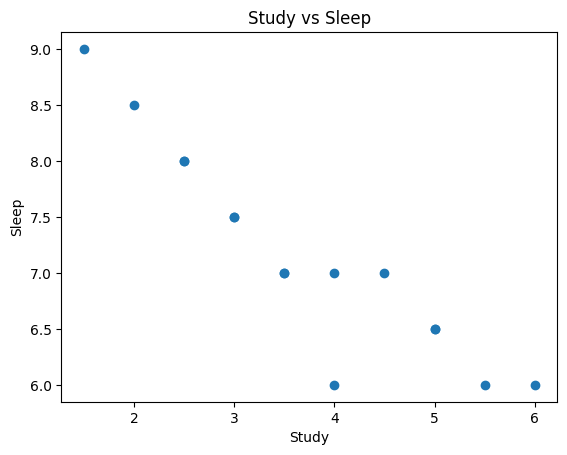

In [6]:
import matplotlib.pyplot as plt
plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study")
plt.ylabel("Sleep")
plt.title("Study vs Sleep")
plt.show()

#Recursion

#Task 1 - Sum of Nested Lists:

In [7]:
def sum_nested_list(lst):
    total = 0
    for x in lst:
        if isinstance(x, list):
            total += sum_nested_list(x)
        else:
            total += x
    return total

print(sum_nested_list([1,[2,[3,4],5],6,[7,8]]))

36


#Task 2 - Generate All Permutations of a String:

In [8]:
from itertools import permutations
def generate_permutations(s):
    return sorted(set(''.join(p) for p in permutations(s)))

print(generate_permutations("abc"))
print(generate_permutations("aab"))

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


#Task 3 - Directory Size Calculation:

In [9]:
def calculate_directory_size(directory):
    total = 0
    for k,v in directory.items():
        if isinstance(v, dict):
            total += calculate_directory_size(v)
        else:
            total += v
    return total

directory_structure = {
    "file1.txt":200,
    "file2.txt":300,
    "subdir1":{
        "file3.txt":400,
        "file4.txt":100
    },
    "subdir2":{
        "subsubdir1":{"file5.txt":250},
        "file6.txt":150
    }
}

print(calculate_directory_size(directory_structure))

1400


# Dynamic Programming

#Task 1 - Coin Change Problem:

In [10]:
def min_coins(coins, amount):
    dp=[float('inf')]*(amount+1)
    dp[0]=0
    for coin in coins:
        for i in range(coin, amount+1):
            dp[i]=min(dp[i], dp[i-coin]+1)
    return dp[amount] if dp[amount]!=float('inf') else -1

print(min_coins([1,2,5],11))

3


#Task 2 - Longest Common Subsequence (LCS):

In [11]:
def longest_common_subsequence(a,b):
    dp=[[0]*(len(b)+1) for _ in range(len(a)+1)]
    for i in range(1,len(a)+1):
        for j in range(1,len(b)+1):
            if a[i-1]==b[j-1]:
                dp[i][j]=dp[i-1][j-1]+1
            else:
                dp[i][j]=max(dp[i-1][j], dp[i][j-1])
    return dp[-1][-1]

print(longest_common_subsequence("abcde","ace"))

3


#Task 3 - 0/1 Knapsack Problem:

In [12]:
def knapsack(weights, values, cap):
    n=len(weights)
    dp=[[0]*(cap+1) for _ in range(n+1)]
    for i in range(1,n+1):
        for c in range(cap+1):
            if weights[i-1] <= c:
                dp[i][c]=max(dp[i-1][c],dp[i-1][c-weights[i-1]]+values[i-1])
            else:
                dp[i][c]=dp[i-1][c]
    return dp[n][cap]

print(knapsack([1,3,4,5],[1,4,5,7],7))

9
